In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# !pip install openpyxl

In [3]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [4]:
dataset.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523


In [5]:
dataset.shape

(9426, 24)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

### Fill the null field

In [8]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [13]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)

In [14]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority data analysis

In [21]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [16]:
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

### Order Priority data clean

In [24]:
dataset["Order Priority"].replace('Critical ', 'Critical', inplace = True)

In [25]:
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

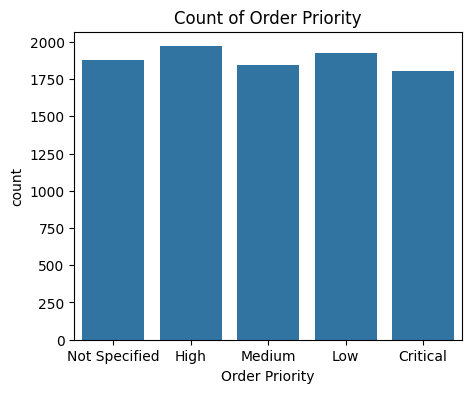

In [37]:
plt.figure(figsize = (5,4))
sns.countplot(x="Order Priority", data= dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")

# Ship mode data analysis

In [38]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [44]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

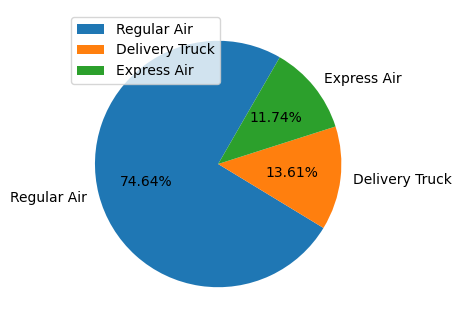

In [55]:
plt.figure(figsize = (5,4))
plt.pie(y,labels=x,startangle=60, autopct="%0.2f%%")
plt.legend(loc= 2)
plt.show()

### Ship mode analysis with product catagory

<Axes: xlabel='Ship Mode', ylabel='count'>

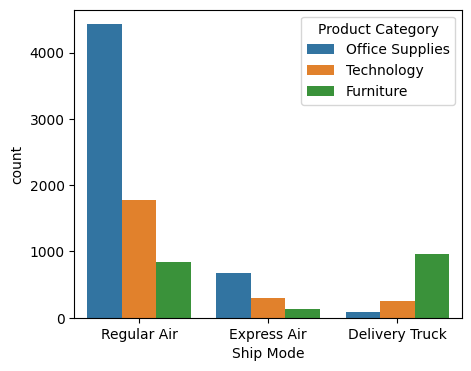

In [57]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Ship Mode', data=dataset, hue= "Product Category")

# Customer Segment analysis

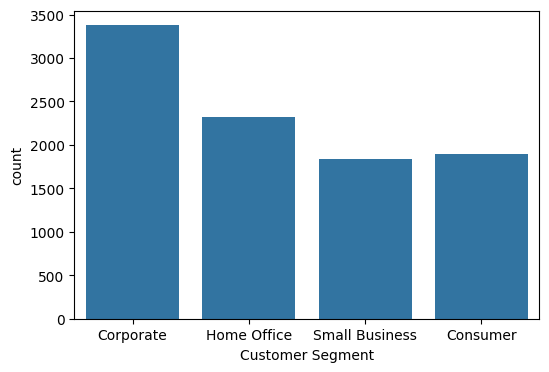

In [61]:
plt.figure(figsize = (6,4))
sns.countplot(x='Customer Segment', data= dataset)
plt.show()

# Product catagory analysis

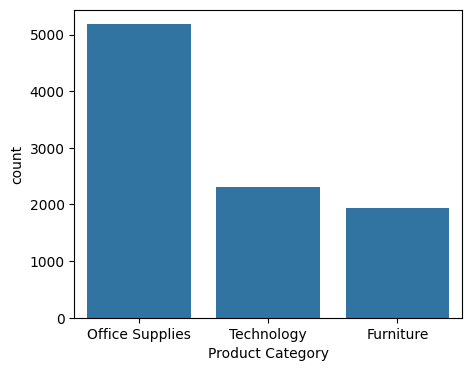

In [66]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Product Category", data = dataset)
plt.show()

### Product catagory with sub catagory

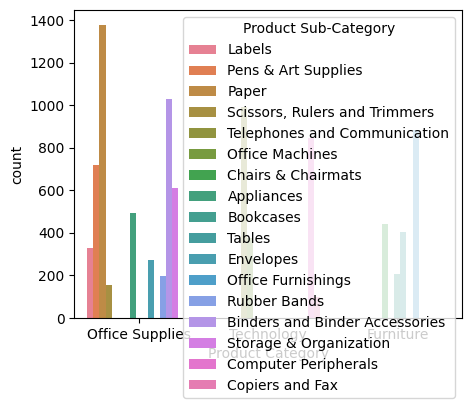

In [67]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Product Category", data = dataset, hue="Product Sub-Category")
plt.show()

### Product catagory with sub catagory of Office supplies only

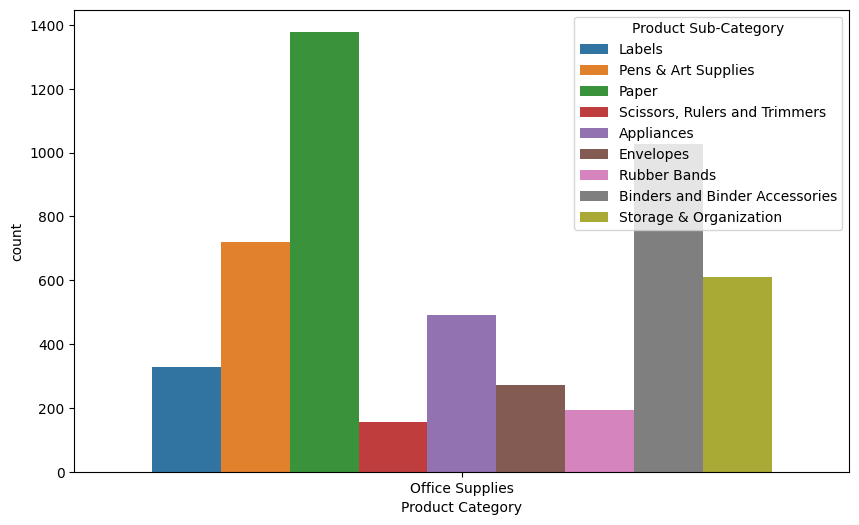

In [72]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Product Category", data = dataset[dataset['Product Category'] == "Office Supplies"], hue="Product Sub-Category")
plt.show()

# Order Year analysis

In [77]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [79]:
dataset['Order Year'].value_counts()


Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

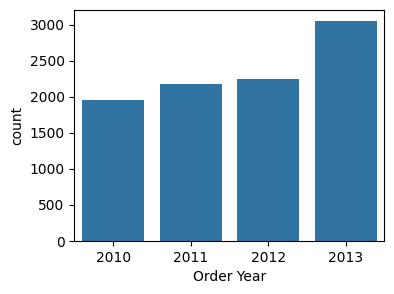

In [81]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'Order Year', data = dataset)
plt.show()

# Profit on catagory analysis

<Axes: xlabel='Product Category', ylabel='Profit'>

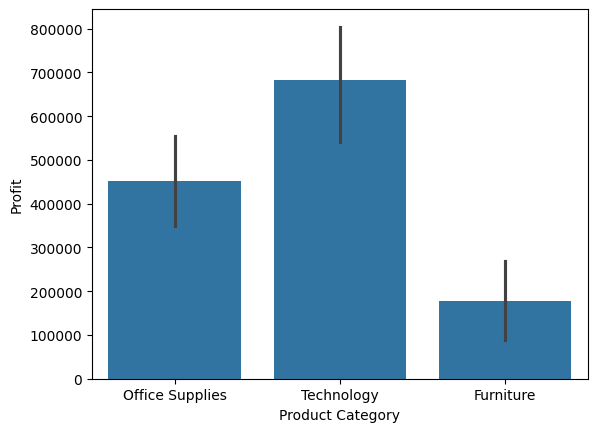

In [84]:
sns.barplot(x = 'Product Category', y = 'Profit', data = dataset, estimator='sum')

# State data analysis

In [89]:
dataset['State or Province'].unique()

array(['Illinois', 'Washington', 'California', 'Massachusetts',
       'New Hampshire', 'New Jersey', 'Rhode Island', 'Minnesota',
       'New York', 'Montana', 'Nebraska', 'Oregon', 'Texas', 'Virginia',
       'Vermont', 'Maine', 'Ohio', 'Louisiana', 'Kansas', 'Connecticut',
       'Utah', 'Pennsylvania', 'Tennessee', 'Colorado', 'Michigan',
       'Arizona', 'Oklahoma', 'Missouri', 'North Carolina', 'Iowa',
       'Florida', 'New Mexico', 'Georgia', 'Maryland', 'Nevada',
       'Mississippi', 'Indiana', 'Kentucky', 'West Virginia', 'Arkansas',
       'South Carolina', 'District of Columbia', 'Idaho', 'Delaware',
       'Alabama', 'Wyoming', 'Wisconsin', 'South Dakota', 'North Dakota'],
      dtype=object)

In [93]:
# Top 5 States
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64